In [1]:
#imports
import pybaseball
from pybaseball import statcast
pybaseball.cache.enable()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#vizi settings
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize']= [10,5]
plt.rcParams['font.family'] = 'serif'
plt.style.use('dark_background')
%matplotlib inline

In [2]:
# collect Statcast data on all pitches from 2018 on
df = statcast(start_dt='2018-03-29', end_dt='2023-10-01')
print(df.shape)

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates


100%|██████████| 1229/1229 [03:46<00:00,  5.42it/s]


(4067402, 92)


In [3]:
df.sample(1)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2692,SI,2019-07-13,93.7,-1.05,5.84,"Bassitt, Chris",650391,605135,None,called_strike,<NA>,<NA>,<NA>,<NA>,5,Eloy Jimenez walks.,R,R,R,OAK,CWS,S,<NA>,None,1,0,2019,-1.32,0.94,-0.08,2.7,<NA>,<NA>,<NA>,0,2,Top,<NA>,<NA>,<NA>,<NA>,543302,<NA>,<NA>,5.434126,-136.473466,-4.551288,-17.726923,26.877636,-19.577328,3.57,1.65,<NA>,<NA>,<NA>,94.3,2105,6.4,566131,605135,543302,621566,620439,656305,543760,543257,657656,592192,54.13,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,15,2,Sinker,7,0,0,7,0,7,0,7,Standard,Standard,234,0.0,-0.05


In [4]:
#create column that is a flag that shows if a pitch resulted in an out or not
df['IsOutPitch'] = df['events'].isin(['field_out', 'strikeout', 'grounded_into_double_play', 'fielders_choice_out', 'force_out', 'sac_fly', 
                                'sac_bunt', 'strikeout_double_play', 'double_play', 'sac_fly_double_play', 'other_out', 'triple_play', 'sac_bunt_double_play']).astype(bool)

In [106]:
# group the data by pitch type and count the number of outs for each pitch type
df_out_results_by_pitch_type = df[df['IsOutPitch']==True].groupby('pitch_type')['pitch_type'].count().sort_values(ascending=False)

# print the results for all years
print("All years:")
print(df_out_results_by_pitch_type)

# group the data by pitch type and count the number of outs for each pitch type for each year
df_out_results_by_pitch_type_2018 = df[(df['IsOutPitch']==True) & (df['game_year']==2018)].groupby('pitch_type')['pitch_type'].count().sort_values(ascending=False)
df_out_results_by_pitch_type_2019 = df[(df['IsOutPitch']==True) & (df['game_year']==2019)].groupby('pitch_type')['pitch_type'].count().sort_values(ascending=False)
df_out_results_by_pitch_type_2021 = df[(df['IsOutPitch']==True) & (df['game_year']==2021)].groupby('pitch_type')['pitch_type'].count().sort_values(ascending=False)
df_out_results_by_pitch_type_2022 = df[(df['IsOutPitch']==True) & (df['game_year']==2022)].groupby('pitch_type')['pitch_type'].count().sort_values(ascending=False)
df_out_results_by_pitch_type_2023 = df[(df['IsOutPitch']==True) & (df['game_year']==2023)].groupby('pitch_type')['pitch_type'].count().sort_values(ascending=False)

# print the results for each year
print("2018 Pitch Outs:")
print(df_out_results_by_pitch_type_2018)
print("2019 Pitch Outs:")
print(df_out_results_by_pitch_type_2019)
print("2021 Pitch Outs:")
print(df_out_results_by_pitch_type_2021)
print("2022 Pitch Outs:")
print(df_out_results_by_pitch_type_2022)
print("2023 Pitch Outs:")
print(df_out_results_by_pitch_type_2023)

# create a list of dataframes for each year
dfs = [df_out_results_by_pitch_type_2018, df_out_results_by_pitch_type_2019, df_out_results_by_pitch_type_2021, df_out_results_by_pitch_type_2022, df_out_results_by_pitch_type_2023]

# concatenate the dataframes into a single dataframe
df_combined = pd.concat(dfs, axis=1, keys=['2018', '2019', '2021', '2022', '2023'])

# display the combined dataframe
#print(df_combined)


All years:
pitch_type
FF    217159
SL    127445
SI    111559
CH     84249
CU     51583
FC     47010
KC     16209
ST     14466
FS     14396
SV      2351
FA       705
EP       344
KN       200
FO       185
CS       123
SC        30
Name: pitch_type, dtype: int64
2018 Pitch Outs:
pitch_type
FF    40326
SI    24389
SL    22431
CH    14402
CU     9452
FC     7604
KC     3732
FS     2350
ST      795
SV      359
KN      137
EP       75
FA       33
FO       14
SC       11
CS        3
Name: pitch_type, dtype: int64
2019 Pitch Outs:
pitch_type
FF    41332
SL    23570
SI    20383
CH    15683
CU    10337
FC     8532
KC     3181
FS     2434
ST     1012
SV      439
CS       49
FA       45
KN       27
EP       16
FO        7
Name: pitch_type, dtype: int64
2021 Pitch Outs:
pitch_type
FF    42085
SL    24708
SI    19474
CH    16152
CU     9433
FC     8849
KC     2860
FS     2528
ST     1804
SV      547
FA      156
CS       27
EP       25
KN        7
SC        1
Name: pitch_type, dtype: int64
2022 Pitch

In [39]:
# Make a copy of df for just the games in 2023
df_out_results_by_pitch_type_2023_player = df[df['game_year'] == 2023].copy()

# Count how many times for a pitch_type and player_name that IsOutPitch is true
# Count how many times for a pitch_type and player_name that IsOutPitch is false
df_out_results_by_pitch_type_2023_player = df_out_results_by_pitch_type_2023_player.groupby(['pitch_type', 'player_name'])['IsOutPitch'].agg([('out_pitch_count', 'sum'), ('total_pitches', 'count')]).reset_index()

#create a column called out_percentage that is out_pitch_count / total_pitches
df_out_results_by_pitch_type_2023_player['out_percentage'] = df_out_results_by_pitch_type_2023_player['out_pitch_count'] / df_out_results_by_pitch_type_2023_player['total_pitches']
#multiply out_percentage by 100 and round to 2 decimal places
df_out_results_by_pitch_type_2023_player['out_percentage'] = (df_out_results_by_pitch_type_2023_player['out_percentage'] * 100).round(2)

# Group the data by pitch type and player name and only keep the pitch_type, player_name, out_pitch_count, not_out_pitch_count, and total_pitches columns
df_out_results_by_pitch_type_2023_player = df_out_results_by_pitch_type_2023_player[['pitch_type', 'player_name', 'out_pitch_count', 'total_pitches','out_percentage']]

#show the head of the dataframe sorted by out_percentage
df_out_results_by_pitch_type_2023_player[(df_out_results_by_pitch_type_2023_player['total_pitches']>=177)].sort_values(by='out_percentage', ascending=False).head(10)


,pitch_type,player_name,out_pitch_count,total_pitches,out_percentage
4045,ST,"Gray, Sonny",183,588,31.12
3069,SI,"Rodriguez, Eduardo",72,233,30.90
2472,FS,"Gilbert, Logan",120,431,27.84
2484,FS,"Leiter Jr., Mark",98,359,27.30
503,CH,"Ramirez, Nick",59,217,27.19
3985,ST,"Beck, Tristan",77,284,27.11
3286,SL,"Bieber, Shane",115,425,27.06
3515,SL,"Henry, Tommy",51,189,26.98
262,CH,"Hendricks, Kyle",229,867,26.41
2446,FS,"Bautista, Félix",67,254,26.38


In [52]:
#show decription of the total_pitches column
df_out_results_by_pitch_type_2023_player['total_pitches'].describe()

count    4191.000000
mean      177.239561
std       245.107385
min         1.000000
25%        13.000000
50%        76.000000
75%       252.500000
max      1838.000000
Name: total_pitches, dtype: float64

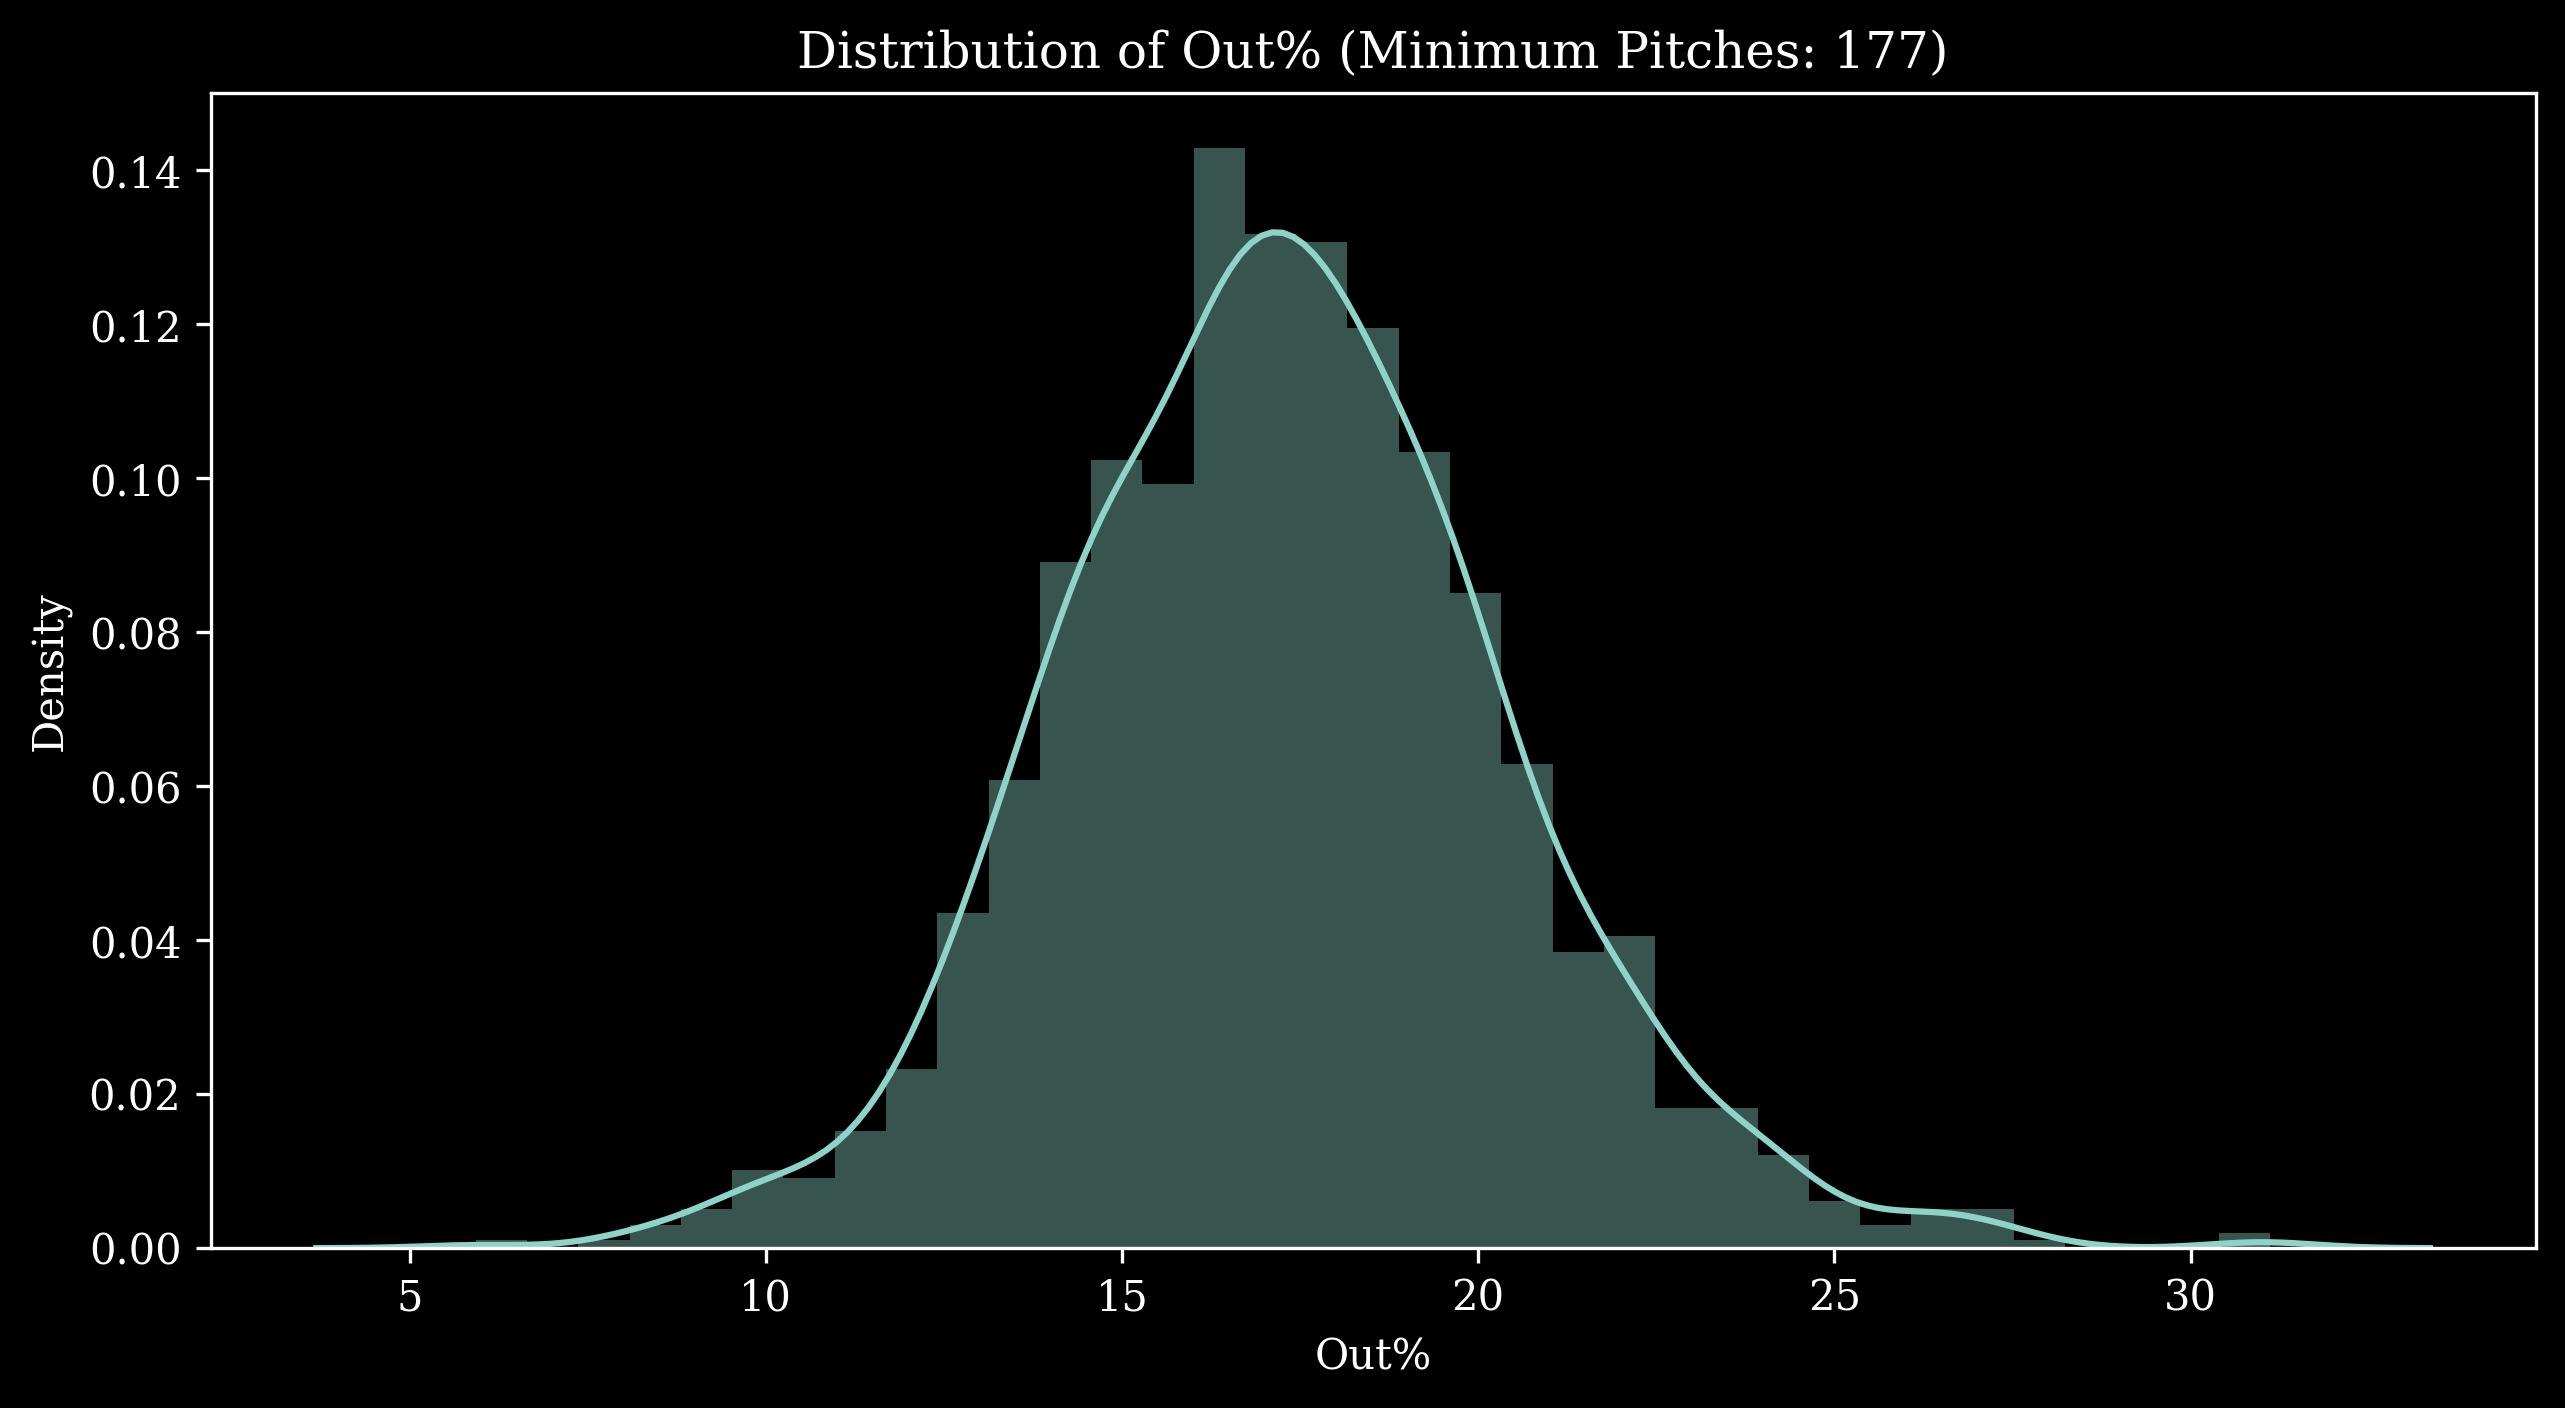

In [55]:
# set the minimum number of pitches
min_pitches = 177

# filter the dataframe to only include rows where total_pitches is greater than or equal to min_pitches
df_filtered_pitch_min = df_out_results_by_pitch_type_2023_player[df_out_results_by_pitch_type_2023_player['total_pitches'] >= min_pitches]

# plot the distribution of out_percentage
sns.distplot(df_filtered_pitch_min['out_percentage'])

# set the title and x-axis label
plt.title('Distribution of Out% (Minimum Pitches: {})'.format(min_pitches))
plt.xlabel('Out%')

#save the plot dpi 300
plt.savefig('OutPct_Distribution.png', bbox_inches='tight', dpi=300)
# plt.show()

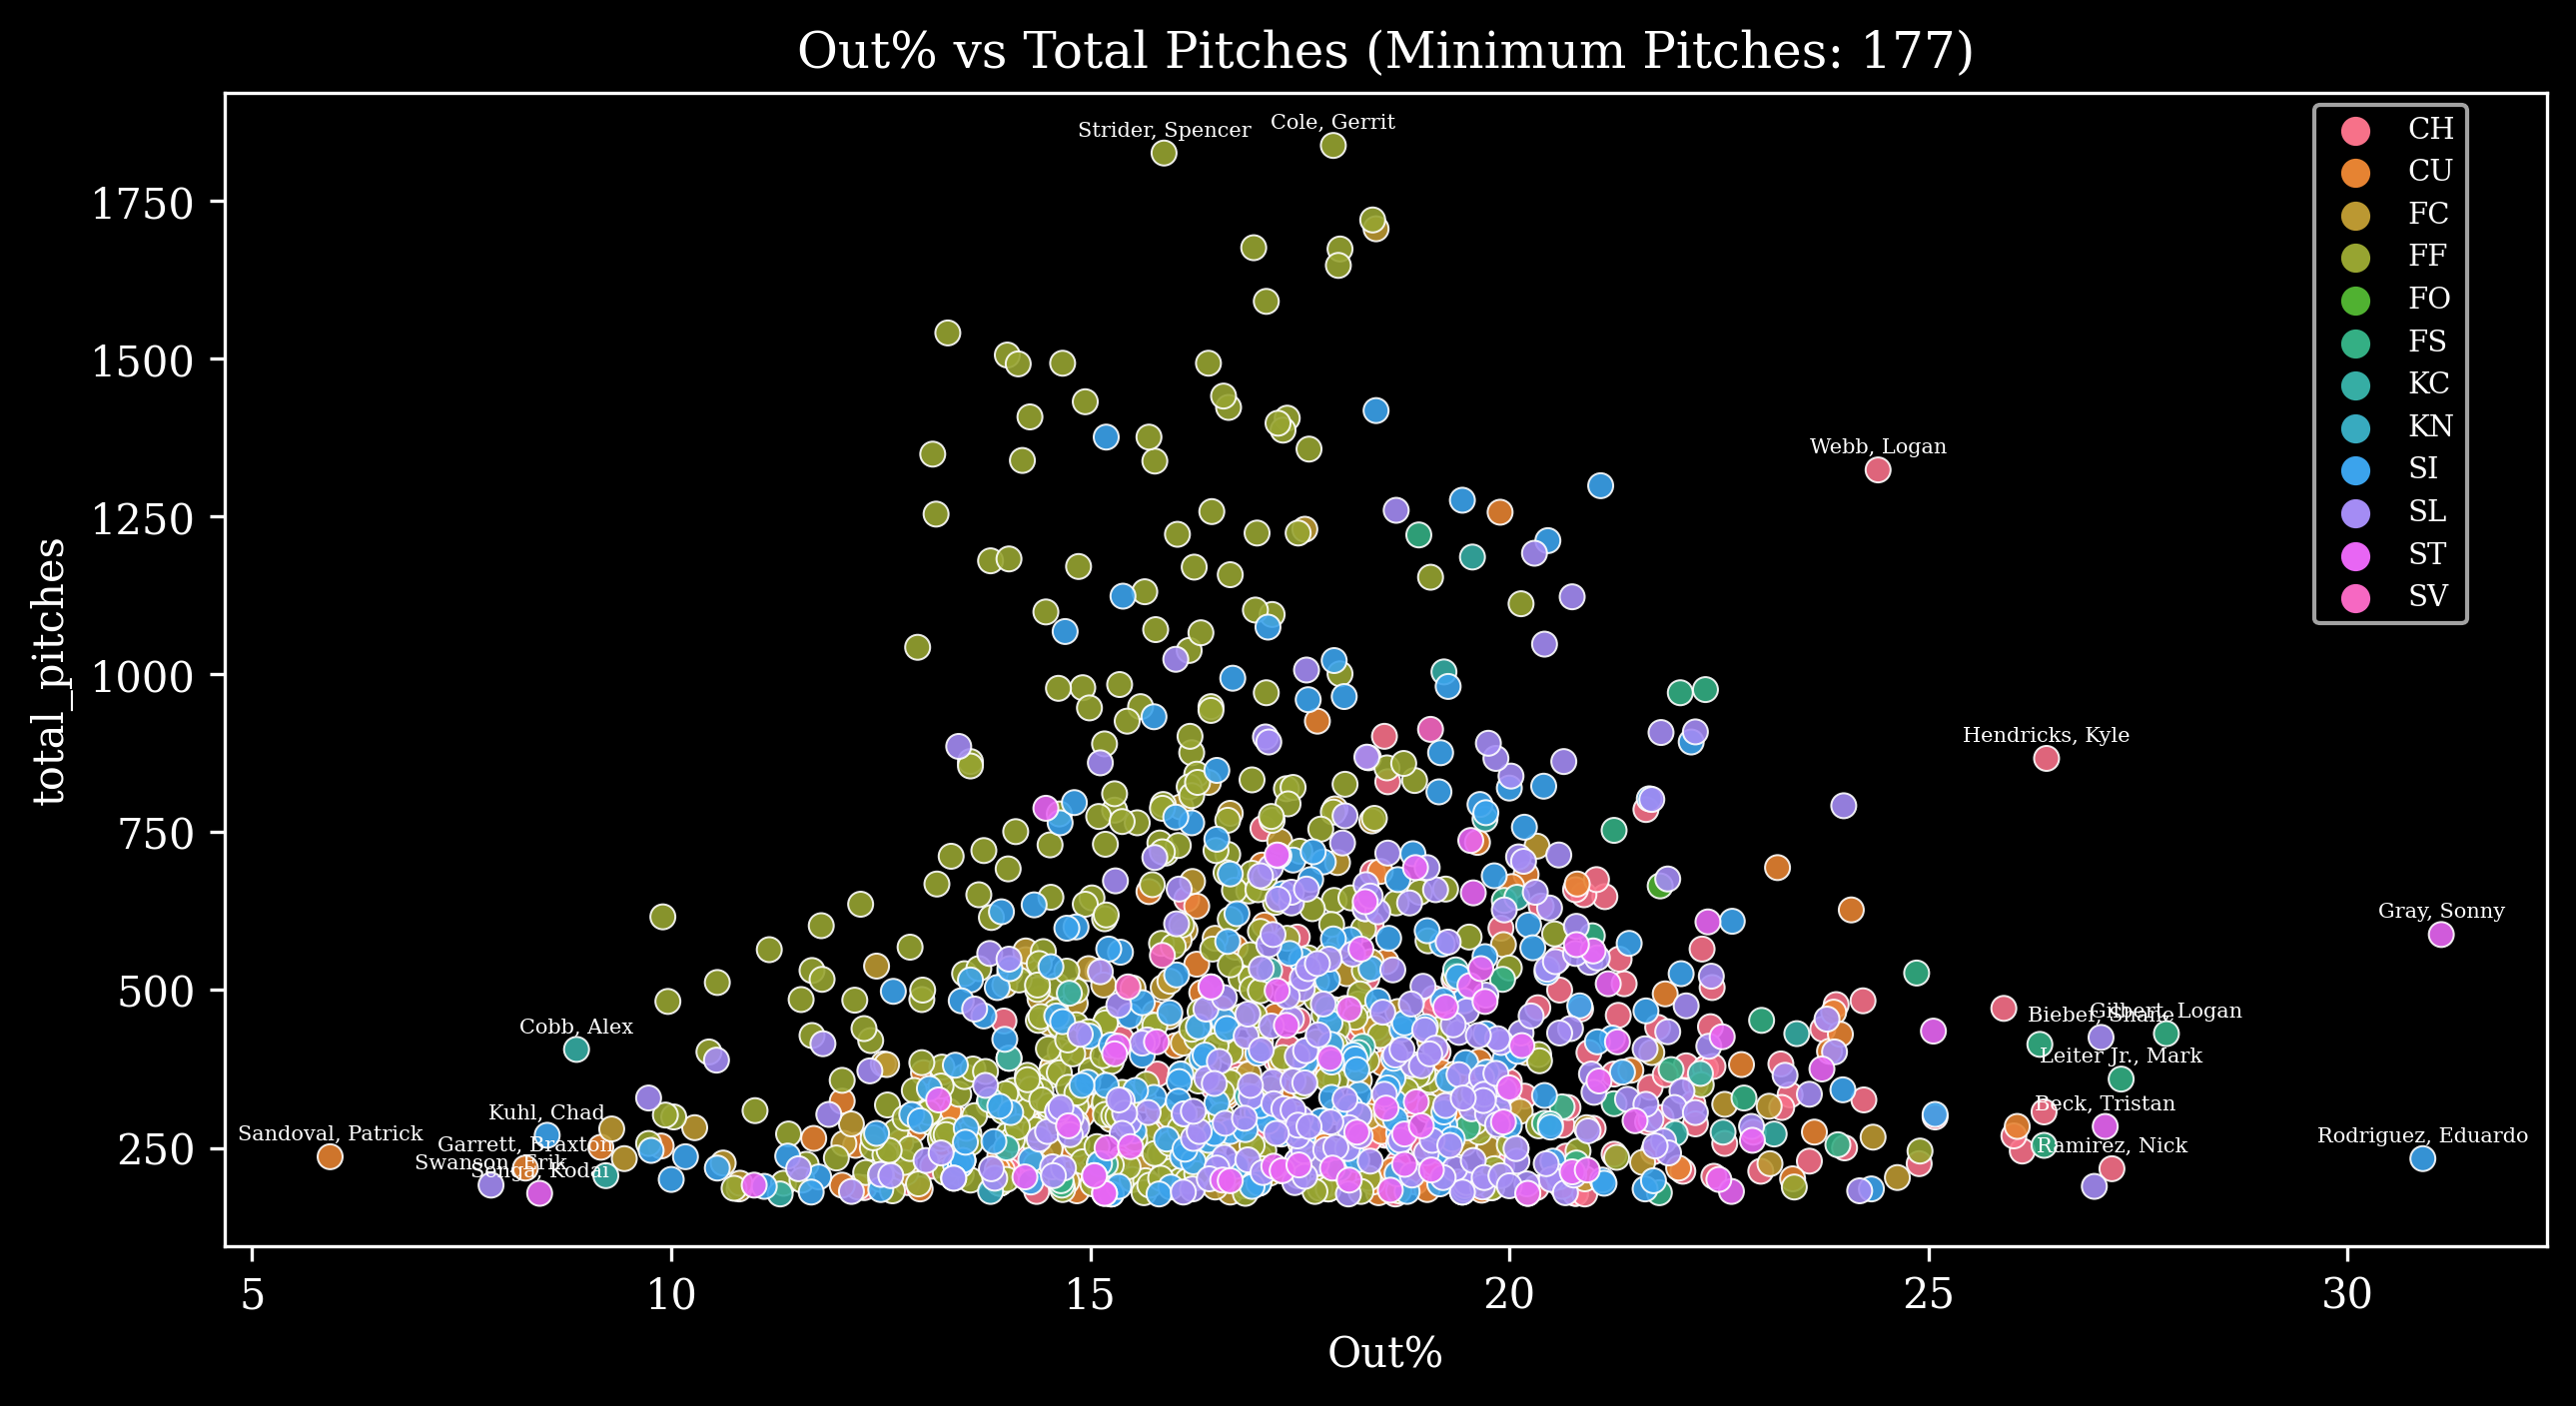

In [105]:
# Create a scatterplot
sns.scatterplot(x='out_percentage', y='total_pitches', data=df_filtered_pitch_min, hue='pitch_type', legend=True, alpha=0.9)

# Add legend to the plot
plt.legend(bbox_to_anchor=(.9,.99), loc=2, borderaxespad=0. , fontsize=7)

# Set the title and x-axis label
plt.title('Out% vs Total Pitches (Minimum Pitches: {})'.format(min_pitches))
plt.xlabel('Out%')

# Identify outliers based on upper and lower bounds for out_percentage and total_pitches
outliers = df_filtered_pitch_min[
    (df_filtered_pitch_min['out_percentage'] > 27) | 
    (df_filtered_pitch_min['out_percentage'] < 9) |
    (df_filtered_pitch_min['total_pitches'] > 1750) |
    (df_filtered_pitch_min['out_percentage'] > 23) & 
    (df_filtered_pitch_min['total_pitches'] > 800)
]

# Annotate outliers with player names
for index, row in outliers.iterrows():
    plt.annotate(row['player_name'], (row['out_percentage'], row['total_pitches']), textcoords="offset points", xytext=(0, 4), ha='center', fontsize=5)

# Save the plot
plt.savefig('OutPct_vs_TotalPitches.png', bbox_inches='tight', dpi=300)

# Show the plot
# plt.show()